In [482]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [483]:
(x_train, y_train), (x_test, y_test) = \
        tf.keras.datasets.mnist.load_data()

In [484]:
x_train = x_train /255 
x_test = x_test /255

In [485]:
x_train.shape

(60000, 28, 28)

## preparing the training pictures by rotating them randomly

In [486]:
rotated_x_train = []
angles_train = np.random.randint(0, 360, 60000)

In [487]:

for i in range(60000):
    x_train_img = Image.fromarray(x_train[i])
    rotated = Image.Image.rotate(x_train_img, angles_train[i])
    rotated_picture = np.array(rotated)
    rotated_x_train.append(rotated_picture)
    
    

In [488]:
#convert to tensor
rotated_x_train = tf.convert_to_tensor(rotated_x_train)

In [489]:
rotated_x_train.shape

TensorShape([60000, 28, 28])

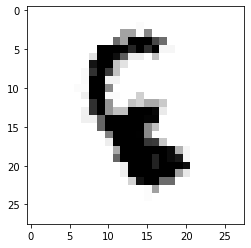

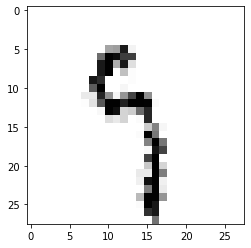

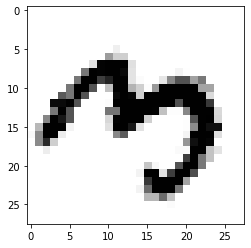

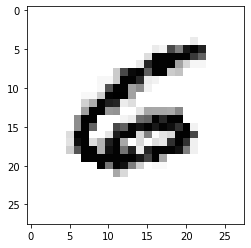

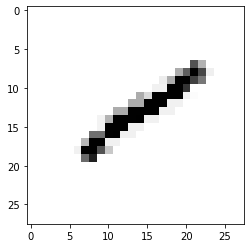

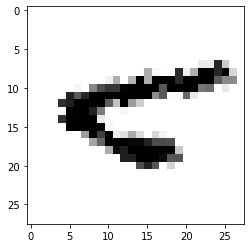

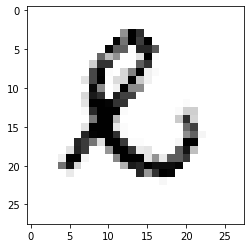

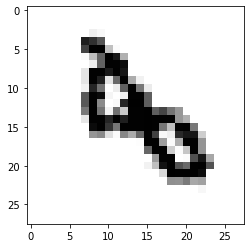

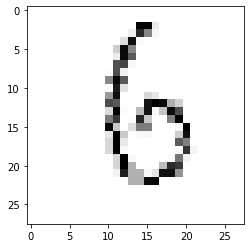

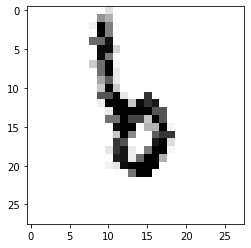

In [490]:
for i in range(10, 20): 
    plt.imshow( rotated_x_train[i], cmap='Greys')
    plt.show()

## preparing the test pictures by rotating them

In [491]:
rotated_x_test = []
angles_test = np.random.randint(0, 360, 10000)

In [492]:
for i in range(10000):
    x_test_img = Image.fromarray(x_test[i])
    rotated = Image.Image.rotate(x_test_img, angles_test[i])
    rotated_picture = np.array(rotated)
    rotated_x_test.append(rotated_picture)

In [493]:
#convert to tensor
rotated_x_test = tf.convert_to_tensor(rotated_x_test) 

In [494]:
rotated_x_test.shape

TensorShape([10000, 28, 28])

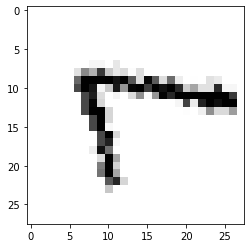

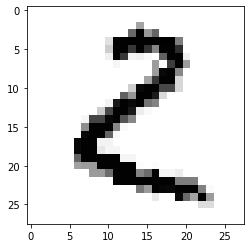

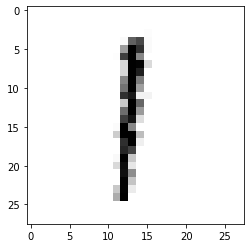

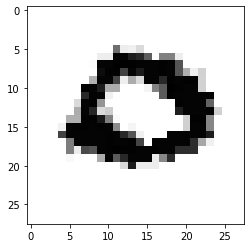

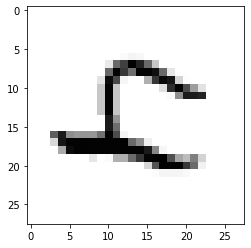

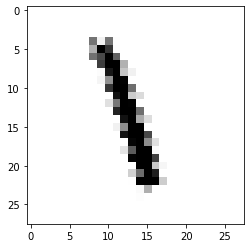

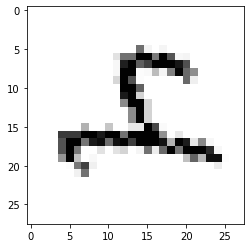

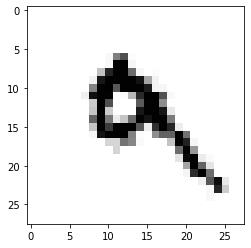

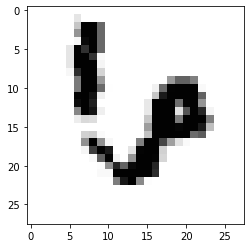

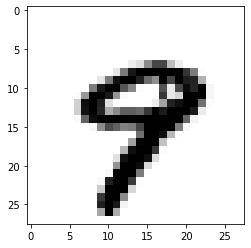

In [495]:
for i in range(10): 
    plt.imshow( rotated_x_test[i], cmap='Greys')
    plt.show()

In [496]:
angles_train.shape

(60000,)

## converting numerical labels to binary labels

In [503]:
angles_train_softmax = np.zeros(shape=(60000,360),dtype=np.float32)    #could be done with to_categorical ??
angles_test_softmax = np.zeros(shape=(10000,360),dtype=np.float32)


for i in range (360):
    angles_train_softmax[np.where(angles_train == i),i] = 1
    angles_test_softmax[np.where(angles_test == i),i] = 1

In [504]:
#convert to tensor
angles_train_softmax = tf.convert_to_tensor(angles_train_softmax) 
angles_test_softmax = tf.convert_to_tensor(angles_test_softmax)

In [505]:
angles_train_softmax.shape

TensorShape([60000, 360])

## Model

In [506]:
#expand dimension

rotated_x_train = tf.expand_dims(rotated_x_train, -1)
rotated_x_test = tf.expand_dims(rotated_x_test, -1)

In [507]:
rotated_x_train.shape

TensorShape([60000, 28, 28, 1, 1])

In [508]:
model = tf.keras.Sequential([

        tf.keras.layers.Input(shape=(28,28,1)),
        tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
        tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(360, activation='softmax')

])

In [509]:
model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [510]:
model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_28 (Flatten)         (None, 9216)              0         
_________________________________________________________________
dense_36 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_19 (Dropout)         (None, 128)             

In [478]:
model.fit(rotated_x_train, angles_train_softmax, batch_size = 128, epochs=30)  

predictions = model.predict(rotated_x_test)


print(tf.reduce_sum(
        tf.cast(
            tf.argmax(predictions,axis=1)==angles_test,
            tf.int16)).numpy())

Train on 60000 samples
Epoch 1/30
60000/60000 [==============================] - 524s 9ms/sample - loss: 5.2420 - accuracy: 0.0137
Epoch 2/30
60000/60000 [==============================] - 509s 8ms/sample - loss: 4.4273 - accuracy: 0.0306
Epoch 3/30
60000/60000 [==============================] - 531s 9ms/sample - loss: 3.9703 - accuracy: 0.0518
Epoch 4/30
60000/60000 [==============================] - 489s 8ms/sample - loss: 3.5841 - accuracy: 0.0898
Epoch 5/30
60000/60000 [==============================] - 485s 8ms/sample - loss: 3.2387 - accuracy: 0.1395
Epoch 6/30
60000/60000 [==============================] - 424s 7ms/sample - loss: 2.9464 - accuracy: 0.1834
Epoch 7/30
60000/60000 [==============================] - 419s 7ms/sample - loss: 2.7046 - accuracy: 0.2284
Epoch 8/30
60000/60000 [==============================] - 383s 6ms/sample - loss: 2.5046 - accuracy: 0.2693
Epoch 9/30
60000/60000 [==============================] - 388s 6ms/sample - loss: 2.3314 - accuracy: 0.3027
Epoch

## testing the model

In [479]:
diff_arr = []
for i in range(10000):
    diff = abs(angles_test[i] - tf.argmax(predictions[i]))
    diff_arr.append(diff)
    
mean_diff = np.mean(diff_arr)


In [480]:
mean_diff

9.8497

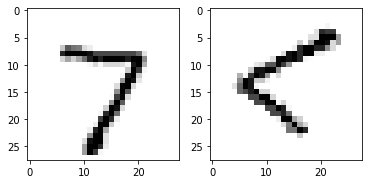

True angle:  147
Predicted angle:  147


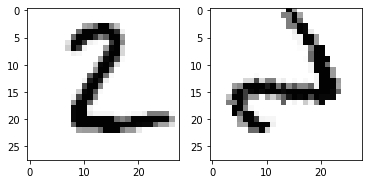

True angle:  116
Predicted angle:  296


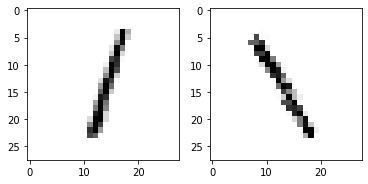

True angle:  227
Predicted angle:  227


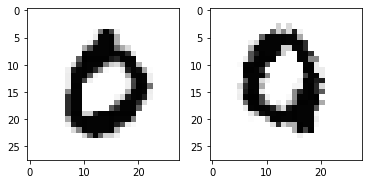

True angle:  209
Predicted angle:  209


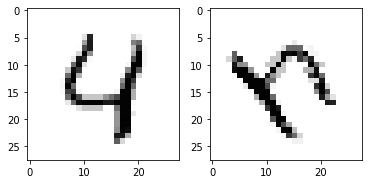

True angle:  229
Predicted angle:  229


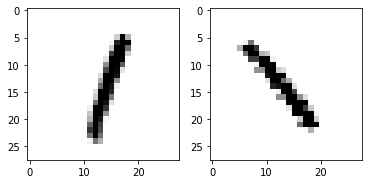

True angle:  237
Predicted angle:  237


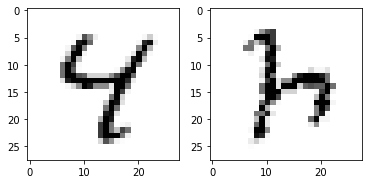

True angle:  199
Predicted angle:  199


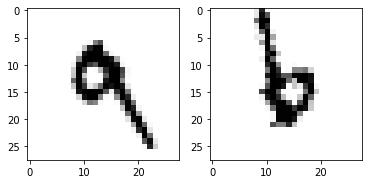

True angle:  161
Predicted angle:  251


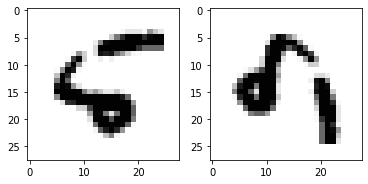

True angle:  268
Predicted angle:  268


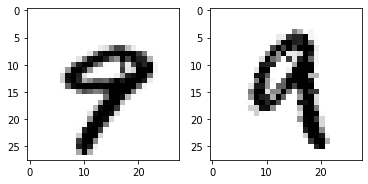

True angle:  46
Predicted angle:  44


In [481]:
for i in range(10):

    original_img = x_test[i]
    true_angle = np.random.randint(360)

    pil_x_train = Image.fromarray(original_img)
    rotated = Image.Image.rotate(pil_x_train, true_angle)
    rotated_picture = np.array(rotated)

    
    f = plt.figure()
    f.add_subplot(1,2, 1)
    plt.imshow(original_img, cmap='Greys')
    f.add_subplot(1,2, 2)
    plt.imshow(rotated_picture, cmap='Greys')
    plt.show()
       
    print("True angle: ", true_angle)

    rotated_picture = np.expand_dims(rotated_picture, (-1,0))

    result = model.predict(rotated_picture)
    predicted_angle = np.argmax(result)
    print("Predicted angle: ", predicted_angle)
